In [1]:
from nba_api.stats.endpoints import leagueleaders
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from nba_api.stats.endpoints import leaguedashplayerstats, synergyplaytypes
from nba_api.stats.endpoints import teamyearbyyearstats, playercareerstats
from nba_api.stats.static.players import find_players_by_full_name, find_player_by_id

from matplotlib.offsetbox import OffsetImage, AnnotationBbox, DrawingArea, TextArea
from matplotlib.patches import Circle, FancyArrowPatch, FancyArrow, ArrowStyle, Arrow
import matplotlib.ticker as mtick
import time
from tqdm import tqdm
from sklearn.cluster import KMeans
import numpy as np
import functools


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

plt.style.use('fivethirtyeight')

/var/folders/wg/8c_xwvyn2tl18ply9w25rmgm0000gn/T/ipykernel_14922/852271923.py:19: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
def convert_season_to_int(season):
    season = season.split('-')[0]
    return int(season) + 1

def convert_int_to_season(year):
    previos_year = year - 1
    year = str(year)
    previous_year = str(previos_year)
    year = year[-2:]
    return f'{previos_year}-{year}'

In [3]:
fmvps_dict = {}

with open('fmvps.txt', 'r') as file:
    for line in file.readlines():
        line = line.rstrip()
        name, season = line.split('-')
        season = convert_int_to_season(int(season))
        
        player = find_players_by_full_name(name)[0]

        id_ = player['id']
        
        fmvps_dict[season] = name, id_

In [4]:
fmvps_dict

{'2022-23': ('Nikola Jokic', 203999),
 '2021-22': ('Stephen Curry', 201939),
 '2020-21': ('Giannis Antetokounmpo', 203507),
 '2019-20': ('LeBron James', 2544),
 '2018-19': ('Kawhi Leonard', 202695),
 '2017-18': ('Kevin Durant', 201142),
 '2016-17': ('Kevin Durant', 201142),
 '2015-16': ('LeBron James', 2544),
 '2014-15': ('Andre Iguodala', 2738),
 '2013-14': ('Kawhi Leonard', 202695),
 '2012-13': ('LeBron James', 2544)}

In [102]:
fmvps_by_season = {}

for season, (player_name, id_) in tqdm(fmvps_dict.items()):

    playoff_all_players = leaguedashplayerstats.LeagueDashPlayerStats(per_mode_detailed='PerGame', season=season, season_type_all_star='Playoffs').get_data_frames()[0]
    
    time.sleep(1)
    
    playoff_all_players_advanced = leaguedashplayerstats.LeagueDashPlayerStats(measure_type_detailed_defense='Advanced', per_mode_detailed='PerGame', season=season, season_type_all_star='Playoffs').get_data_frames()[0]
    
    playoff_all_players = pd.merge(playoff_all_players, playoff_all_players_advanced, on=["PLAYER_ID", "TEAM_ID", 'PLAYER_NAME'])
    
    ppg = float(playoff_all_players[playoff_all_players['PLAYER_ID'] == id_].PTS)
    rpg = float(playoff_all_players[playoff_all_players['PLAYER_ID'] == id_].REB_PCT)
    apg = float(playoff_all_players[playoff_all_players['PLAYER_ID'] == id_].AST_PCT)
    
    fmvps_by_season[season] = [player_name, id_, ppg, rpg, apg]
    
    time.sleep(1)

  0%|                                                                                                                              | 0/11 [00:00<?, ?it/s]/var/folders/wg/8c_xwvyn2tl18ply9w25rmgm0000gn/T/ipykernel_14922/1361265701.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ppg = float(playoff_all_players[playoff_all_players['PLAYER_ID'] == id_].PTS)
/var/folders/wg/8c_xwvyn2tl18ply9w25rmgm0000gn/T/ipykernel_14922/1361265701.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rpg = float(playoff_all_players[playoff_all_players['PLAYER_ID'] == id_].REB_PCT)
/var/folders/wg/8c_xwvyn2tl18ply9w25rmgm0000gn/T/ipykernel_14922/1361265701.py:15: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ap

In [103]:
fmvps_by_season

{'2022-23': ['Nikola Jokic', 203999, 30.0, 0.176, 0.395],
 '2021-22': ['Stephen Curry', 201939, 27.4, 0.073, 0.269],
 '2020-21': ['Giannis Antetokounmpo', 203507, 30.2, 0.162, 0.242],
 '2019-20': ['LeBron James', 2544, 27.6, 0.153, 0.421],
 '2018-19': ['Kawhi Leonard', 202695, 30.5, 0.115, 0.188],
 '2017-18': ['Kevin Durant', 201142, 29.0, 0.1, 0.2],
 '2016-17': ['Kevin Durant', 201142, 28.5, 0.109, 0.179],
 '2015-16': ['LeBron James', 2544, 26.3, 0.124, 0.349],
 '2014-15': ['Andre Iguodala', 2738, 10.4, 0.072, 0.185],
 '2013-14': ['Kawhi Leonard', 202695, 14.3, 0.112, 0.077],
 '2012-13': ['LeBron James', 2544, 25.9, 0.111, 0.3]}

2019-20 LeBron James 27.6 57.4
2022-23 Nikola Jokic 30.0 57.099999999999994
2015-16 LeBron James 26.3 47.3
2012-13 LeBron James 25.9 41.1
2020-21 Giannis Antetokounmpo 30.2 40.4
2021-22 Stephen Curry 27.4 34.2
2018-19 Kawhi Leonard 30.5 30.3
2017-18 Kevin Durant 29.0 30.0
2016-17 Kevin Durant 28.5 28.799999999999997
2014-15 Andre Iguodala 10.4 25.7
2013-14 Kawhi Leonard 14.3 18.900000000000002


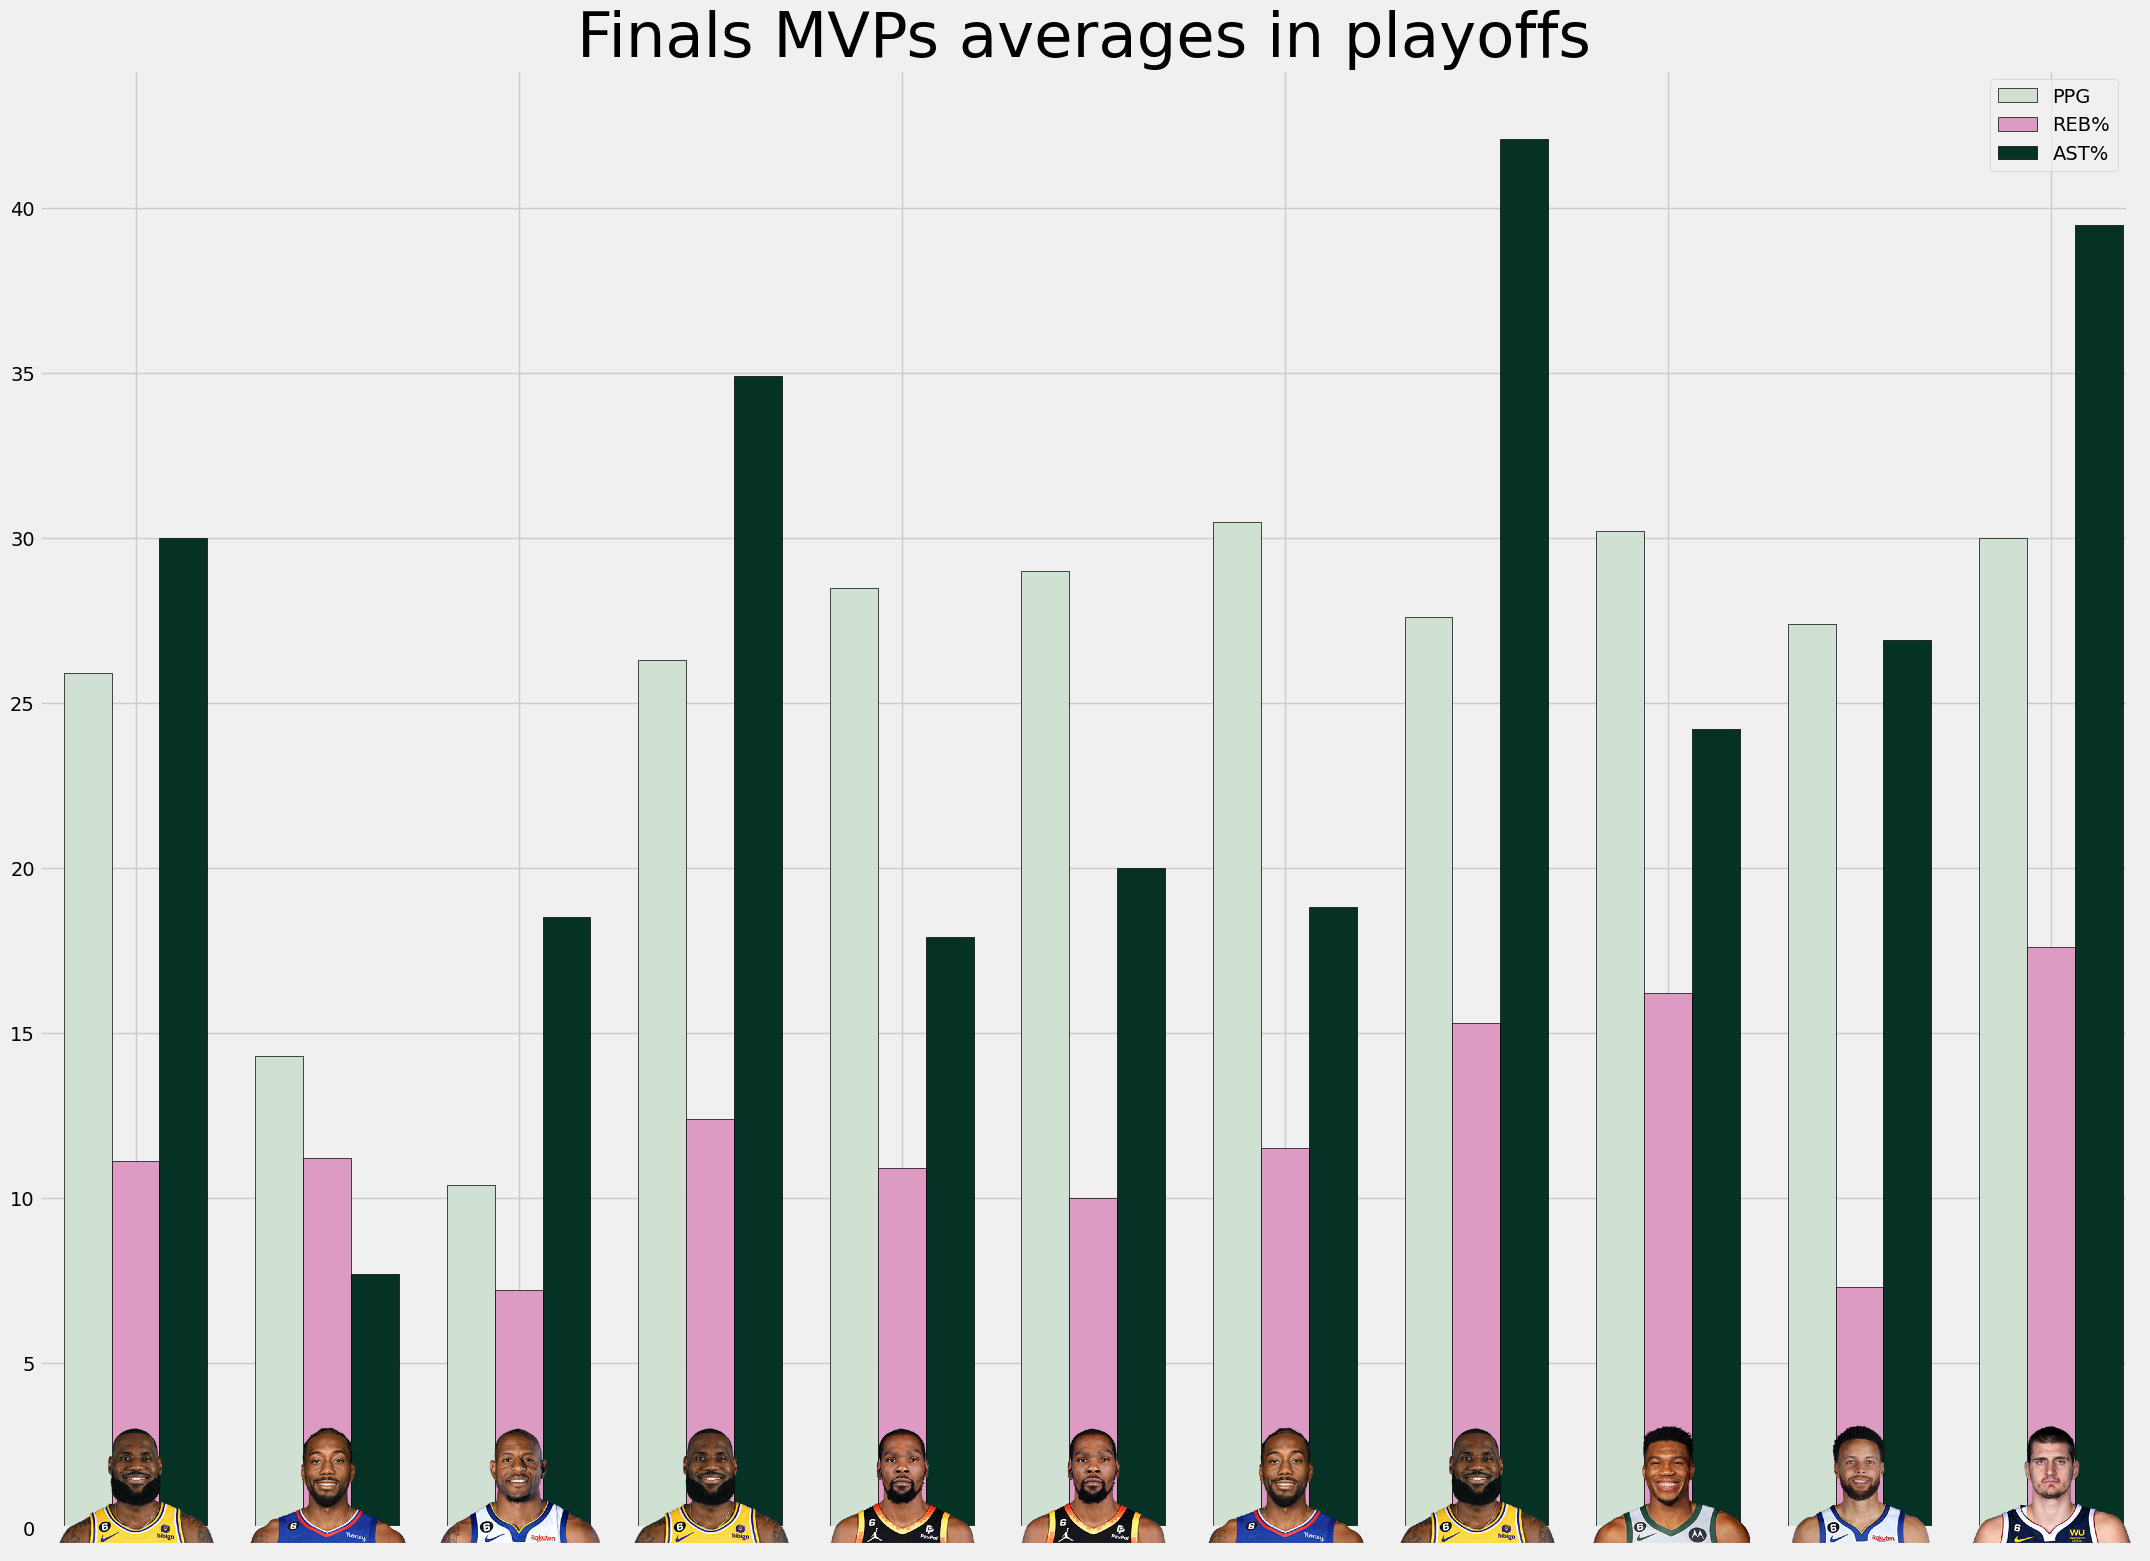

In [113]:
# zoom = 0.35 - 18, 18
zoom = 0.45
player_root_dir = 'player_imgs/'

ppg_c = '#D0E1D4'
rpg_c = '#DD9AC2'
apg_c = '#053225'
edge_color = 'black'

width = 0.25

combined_list = []
years = list(reversed((fmvps_dict.keys())))
# print(years)

x_ticks_years = list(map(convert_season_to_int, years))

# print(x_ticks_years)

def get_player_img(player_id):
    #print(path)
    return OffsetImage(plt.imread(f'{player_root_dir}{player_id}.png'), zoom=zoom)

fig, ax = plt.subplots(figsize=(24, 18))

for i, (season, (player_name, id_, ppg, rpg, apg)) in enumerate(reversed(fmvps_by_season.items())):
    
    x = i
    
    rpg = rpg * 100
    apg = apg * 100
    
    if i == 0:
            
        ax.bar(x - width, ppg, width=width, color=ppg_c, label='PPG', edgecolor=edge_color)
        ax.bar(x, rpg, width=width, color=rpg_c, label='REB%', edgecolor=edge_color)
        ax.bar(x + width, apg, width=width, color=apg_c, label='AST%', edgecolor=edge_color)
        
    else:
        
        
        ax.bar(x - width, ppg, width=width, color=ppg_c, edgecolor=edge_color)
        ax.bar(x, rpg, width=width, color=rpg_c, edgecolor=edge_color)
        ax.bar(x + width, apg, width=width, color=apg_c, edgecolor=edge_color)
    
    ab = AnnotationBbox(get_player_img(id_), (x, 1.325), frameon=False)
    ax.add_artist(ab)
    
    combined_list.append([season, player_name, ppg, rpg+apg])
    # print(f'{player_name} {ppg+rpg+apg}')
    
    
combined_list = sorted(combined_list, key=lambda x: x[-1], reverse=True)

for season, player, ppg, p in combined_list:
    print(season, player, ppg, p)

plt.legend()
# ax.set_xlabel("Seasons", fontsize=25)
# ax.set_ylabel("Counting Stats", fontsize=25)
# ax.set_xticks(list(range(len(fmvps_by_season.keys()))))
# ax.set_xticklabels(years)
ax.set_title("Finals MVPs averages in playoffs", fontdict={'fontsize': 45})
ax.set_xlim([-0.5, len(fmvps_dict) - 0.6])

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off


# ab = AnnotationBbox(OffsetImage(plt.imread(f'twitter_logo (1).png'), zoom=0.1), (9.285, 32), frameon=False)
# ax.add_artist(ab)
# ax.text(x=9.9, y=31.9, ha='right', s='@FHuzjan', size=15)
plt.savefig('Graphs/fmvps.png', bbox_inches='tight')

['2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23']
[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
Andre Iguodala 18.5
Kawhi Leonard 22.7
Stephen Curry 38.5
Kevin Durant 40.699999999999996
LeBron James 40.9
Kevin Durant 41.5
LeBron James 43.4
Kawhi Leonard 43.5
LeBron James 47.2
Giannis Antetokounmpo 48.1
Nikola Jokic 53.0
39.81818181818182


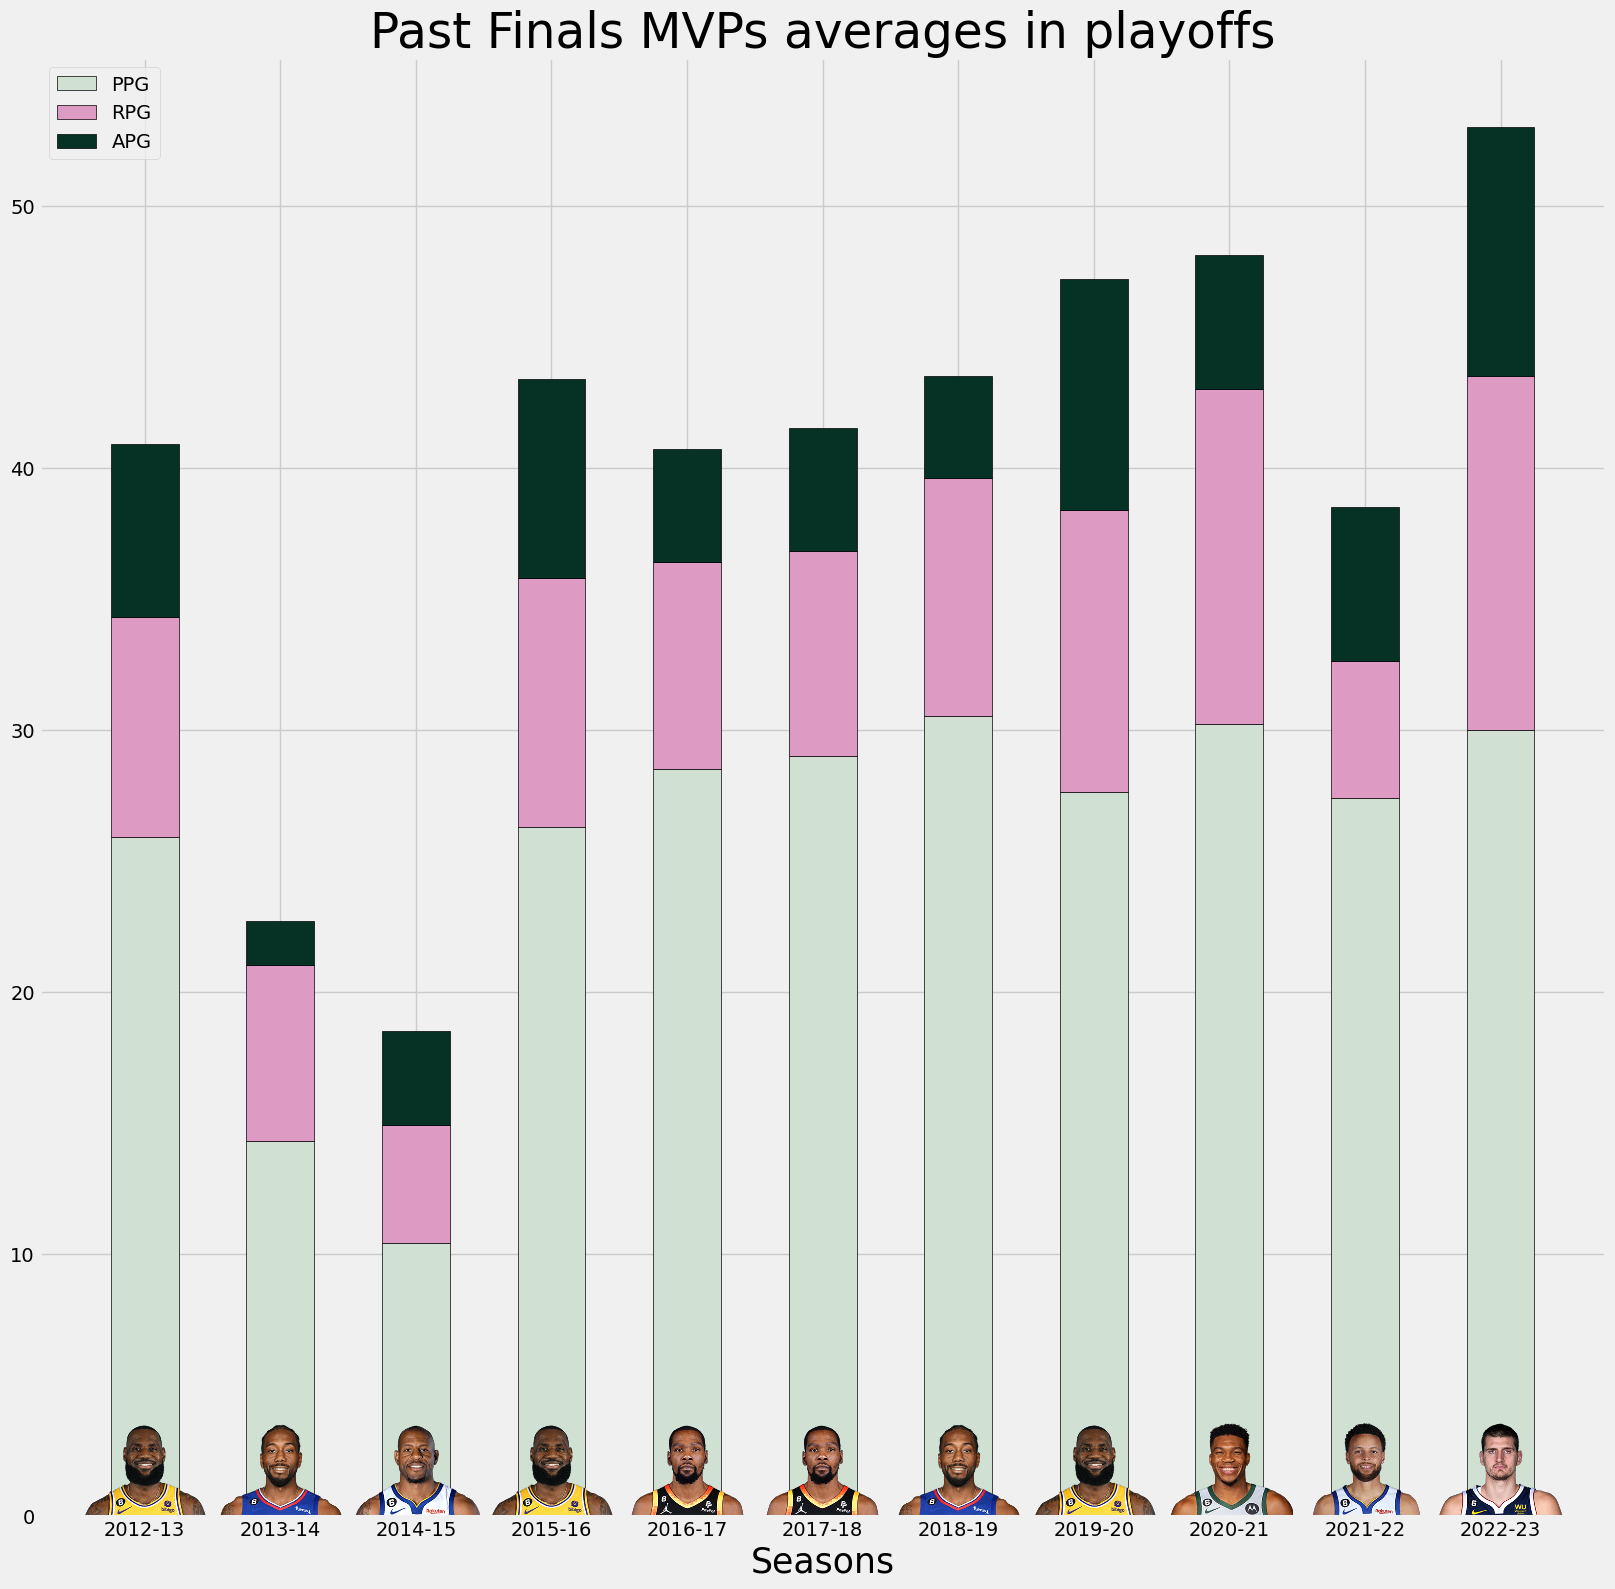

In [19]:
zoom = 0.35
player_root_dir = 'player_imgs/'

ppg_c = '#D0E1D4'
rpg_c = '#DD9AC2'
apg_c = '#053225'
edge_color = 'black'

width = 0.5

combined_list = []
years = list(reversed((fmvps_dict.keys())))
print(years)

x_ticks_years = list(map(convert_season_to_int, years))

print(x_ticks_years)

def get_player_img(player_id):
    #print(path)
    return OffsetImage(plt.imread(f'{player_root_dir}{player_id}.png'), zoom=zoom)

fig, ax = plt.subplots(figsize=(18, 18))

for i, (season, (player_name, id_, ppg, rpg, apg)) in enumerate(reversed(fmvps_by_season.items())):
    
    if i == 0:
    
        ax.bar(i, ppg, width=width, color=ppg_c, label='PPG', edgecolor=edge_color)
        ax.bar(i, rpg, bottom=ppg, width=width, color=rpg_c, label='RPG', edgecolor=edge_color)
        ax.bar(i, apg, bottom=ppg + rpg ,width=width, color=apg_c, label='APG', edgecolor=edge_color)
        
    else:
        ax.bar(i, ppg, width=width, color=ppg_c, edgecolor=edge_color)
        ax.bar(i, rpg, bottom=ppg, width=width, color=rpg_c, edgecolor=edge_color)
        ax.bar(i, apg, bottom=ppg + rpg, width=width, color=apg_c, edgecolor=edge_color)
    
    ab = AnnotationBbox(get_player_img(id_), (i, 1.8), frameon=False)
    ax.add_artist(ab)
    
    combined_list.append([player_name, ppg+rpg+apg])
    # print(f'{player_name} {ppg+rpg+apg}')
    
    
combined_list = sorted(combined_list, key=lambda x: x[1])
plt.legend()
ax.set_xlabel("Seasons", fontsize=25)
# ax.set_ylabel("Counting Stats", fontsize=25)
ax.set_xticks(list(range(len(fmvps_by_season.keys()))))
ax.set_xticklabels(years)
ax.set_title("Past Finals MVPs averages in playoffs", fontdict={'fontsize': 35})

# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False) # labels along the bottom edge are off

plt.savefig('Graphs/stacked_fmvps.png', bbox_inches='tight')

score = 0
for name, combined in combined_list:
    score += combined
    print(name, combined)
    
print(score / len(combined_list))